# _Likelihood_

Misschien wel de belangrijkste toepassing van probabiliteitstheorie in de context van ML is dat het ons toelaat om rekening te houden met _sampling errors_ bij het ontwerpen van modellen. Daardoor krijgen we de mogelijkheid om **de onzekerheid over parameters en predicties te kwantificeren op basis van probabiliteitstheorie en zelfs modelparameters via probabiliteitstheorie te schatten en modellen te vergelijken**. We bekijken dit terug in de context van eenvoudige lineaire regressie. 

In het algemene lineaire regressiemodel stellen we dat onze data $\pmb{y}$ afkomstig zijn van een onderliggende lineaire combinatie van predictoren (features) $\pmb{X}\pmb{b}$ mét {u}`additieve sampling-ruis` $\pmb{e}$.

$$
\pmb{y} = \pmb{X}\pmb{b} + \pmb{e}
$$

Toen we dit model {ref}`introduceerden <target-coffee-simulation>`, hebben we bij het simuleren van data de errors $e_i$ gesampled uit een normaalverdeling met gemiddelde $0$ en een bepaalde (populatie) standaardafwijking $\sigma$:

$$
e_i \sim \mathcal{N}(0, \sigma^2)
$$

Tot nu toe deden we verder niets met deze assumptie. We waren enkel begaan met het leren van de onbekende lineaire parameters $b$. Hier zullen we echter de parameter van de ruis-verdeling $\sigma$ ook als een leerbare parameter beschouwen. Dit opent de deur naar probabiliteits- en informatietheoretische benaderingen.

## Maximum _likelihood_ (ML)

Door de regels voor {ref}`lineaire combinaties van kansvariabelen <target-lineair-expectation>` toe te passen, krijgen we volgende formulering voor de kansverdeling van de data (gegeven de feature matrix $\pmb{X}$, de parameters $\pmb{b}$ en de ruis standaarddeviatie $\sigma$):

$$
p(\pmb{y}|\pmb{X}, \pmb{b}, \sigma) = \mathcal{N}(\pmb{X}\pmb{b}, \pmb{I}\sigma^2)
$$

In woorden: de gezamenlijke (_joint_) kansverdeling van de data is een multivariate normaalverdeling met gemiddelde $\pmb{X}\pmb{b}$ en een homogene variantie $\sigma^2$ zodat:

$$
\begin{align}
p(y_i|\pmb{x}_i^T\pmb{b}, \sigma) = \mathcal{N}(\pmb{x}_i^T\pmb{b}, \sigma^2)
\end{align}
$$

De {ref}`variantie-covariantiematrix <target-covariance-matrix>` van de gezamenlijke (_joint_) kansverdeling is dus een diagonaalmatrix met constante variantie $\sigma^2$ ($\Sigma = \sigma^2$). Het feit dat de niet-diagonaal elementen van de variantie-covariantiematrix nul zijn, geeft aan dat we in ons model ervan uitgaan dat alle datapunten $y_i$ en $y_j$ onafhankelijk van elkaar zijn.  
  
:::{important}
(target-likelihood-function)=
De conditionele verdeling $p(\pmb{y}|\pmb{X}, \pmb{b}, \sigma)$ wordt de **_likelihood_ functie** genoemd. Ze drukt uit hoe waarschijnlijk het is om de data sample te observeren gegeven het model. We zullen in wat volgt zien dat dit een krachtig concept is om (a) tot parameterschattingen te komen, (b) de onzekerheid van parameterschattingen en predicties uit te drukken en (c) modellen met elkaar te vergelijken. De uiteenzetting focust op lineaire regressiemodellen, maar het concept is net zo krachtig omdat het breed toepasbaar is over quasi alle modeltypes in machine learning.
:::

Geven de assumptie dat de individuele observaties {u}`onafhankelijk` van elkaar zijn, kunnen we via de vereenvoudigde productregel (zonder conditionele kansen $P(x, y) = P(y)P(x)$) de likelihood functie bij lineaire regressie met normaal verdeelde homogene ruis als het product van de individuele kansen uitdrukken:

$$
\begin{align}
p(\pmb{y}|\pmb{X}, \pmb{b}, \sigma) &= p(y_1|\pmb{x}_1^T\pmb{b}, \sigma) \times p(y_2|\pmb{x}_2^T\pmb{b}, \sigma) \times \dots \times p(y_N|\pmb{x}_N^T\pmb{b}, \sigma) \cr
&= \prod_{n=1}^{N}p(y_n|\pmb{x}_n^T\pmb{b}, \sigma) \cr
&= \prod_{n=1}^{N}\mathcal{N}(\pmb{x}_n^T\pmb{b}, \sigma^2)
\end{align}
$$

We kunnen nu de vraag stellen: **welke waarden voor de onbekende parameters $\pmb{b}$ én $\sigma$ zorgen voor een _maximale likelihood_**[^compare]? Ook hier kunnen we dit slim benaderen door de _gradient_ van de likelihoodfunctie te berekenen (in plaats van grid search of ongeleide monte-carlo sampling). Daarvoor is het handig om het product in vergelijking (3) om te zetten naar een som door over te stappen naar de _log likelihood functie_[^log]:

[^compare]: Vergelijk dit met: _Welke waarden voor de onbekende parameters $\pmb{b}$ zorgen voor minimale sum of squared errors_?
[^log]: $\ln a \times b = \ln a + \ln b$

$$
\ln p(\pmb{y}|\pmb{X}, \pmb{b}, \sigma) = \sum_{n=1}^{N} \ln \mathcal{N}(\pmb{x}_n^T\pmb{b}, \sigma^2)
$$

Als we nu de {ref}`formulering van de normaalverdeling <target-normal-function>` invoegen, krijgen we:

$$
\begin{align}
\ln p(\pmb{y}|\pmb{X}, \pmb{b}, \sigma) 
&= \sum_{n=1}^{N} \ln \left[\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y_n-\pmb{x}_n^T\pmb{b})^2}{2\sigma^2}}\right] \\
&= \sum_{n=1}^{N} \left[\ln\frac{1}{\sqrt{2\pi\sigma^2}} + \ln e^{-\frac{(y_n-\pmb{x}_n^T\pmb{b})^2}{2\sigma^2}}\right] \\
&= \sum_{n=1}^{N} \left[-\frac{1}{2}\ln(2\pi\sigma^2) - \frac{(y_n-\pmb{x}_n^T\pmb{b})^2}{2\sigma^2}\right] \\
&= -\frac{N}{2}\ln(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2 \\
&= -\frac{N}{2}\ln(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2
\end{align}
$$

### $\pmb{b}_{ML}$
Als we ons eerst richten tot de schatting van $\pmb{b}_{ML}$, kunnen we ons focussen op de tweede term, aangezien $\pmb{b}$ niet deelneemt aan de eerste term en die term dus geen invloed heeft op het maximum met betrekking tot de lineaire gewichten $\pmb{b}$. Bovendien kunnen we ook $\frac{1}{2\sigma^2}$ achterwege laten, aangezien dit slechts een schaalfactor is. We zoeken dus het maximum van:

$$
- \sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2
$$

:::{important}
Als we de log-likelihood willen maximaliseren met betrekking tot de lineaire gewichten $\pmb{b}$, in de veronderstelling van Gaussiaanse ruis, bekomen we dus dat dit **equivalent is aan het minimaliseren van de _sum of squared errors_**:

$$
\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2
$$

We kunnen hier dus gewoon de eerder geziene {ref}`OLS <target-ols>` oplossing of de {ref}`gradient descent oplossing <target-gradient>` gebruiken! 
:::

### $\sigma^2_{ML}$

Het voordeel van de likelihood-benadering is dat we ook een optimale schatting voor de variantie $\sigma^2$ kunnen vinden door de gradient te berekenen.

We vertrekken van de log-likelihood functie en willen de gradient met betrekking tot $\sigma^2$:

$$
\ln p(\pmb{y}|\pmb{X}, \pmb{b}, \sigma) = -\frac{N}{2}\ln(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2
$$

We behandelen beide termen apart:

**Term 1**: $-\frac{N}{2}\ln(2\pi\sigma^2) = -\frac{N}{2}\ln(2\pi) - \frac{N}{2}\ln(\sigma^2)$

De afgeleide naar $\sigma^2$ (waarbij $2\pi$ een constante is)[^rule1]:

$$
\frac{\partial}{\partial \sigma^2}\left[-\frac{N}{2}\ln(\sigma^2)\right] = -\frac{N}{2} \cdot \frac{1}{\sigma^2}
$$

[^rule1]: $\frac{d}{dx}\ln(x) = \frac{1}{x}$

**Term 2**: $-\frac{1}{2\sigma^2}\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2 = -\frac{1}{2}(\sigma^2)^{-1}\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2$

We gebruiken de machtsregel voor de afgeleide[^rule2]. Laat $S = \sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2$, dan:

$$
\frac{\partial}{\partial \sigma^2}\left[-\frac{1}{2}(\sigma^2)^{-1}S\right] = -\frac{1}{2}S \cdot (-1)(\sigma^2)^{-2} = \frac{S}{2(\sigma^2)^2}
$$

[^rule2]: $\frac{d}{dx}x^n = nx^{n-1}$, dus $\frac{d}{dx}x^{-1} = -x^{-2}$

**Combineren en gelijkstellen aan nul**:

$$
\begin{align}
-\frac{N}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2 &= 0 \\
\frac{1}{2(\sigma^2)^2}\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2 &= \frac{N}{2\sigma^2} \\
\end{align}
$$

Vermenigvuldig beide zijden met $2\sigma^2$:

$$
\begin{align}
\frac{1}{\sigma^2}\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2 &= N \\
\sigma^2 &= \frac{1}{N}\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2
\end{align}
$$

**De maximum likelihood schatting voor de variantie in een lineaire regressie met homogene Gaussiaanse ruis is dus gelijk aan de _{ref}`mean squared error <target-mse>`_**:

$$
\hat{\sigma}^2_{ML} = \frac{1}{N}\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\hat{\pmb{b}})^2
$$

:::{important}
In de praktijk wordt de _unbiased_ (onvertekende) schatting gebruikt met $N-M$ (waarbij $M$ het aantal modelparameters is) in de noemer in plaats van $N$, om te corrigeren voor het feit dat we de parameters $\pmb{b}$ ook uit de data hebben geschat.

$$
\hat{\sigma}^2_{ML'} = \frac{1}{N-M}\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\hat{\pmb{b}})^2
$$
:::

## Fisher information

Naast het feit dat het principe van maximum likelihood gemakkelijk toe te passen is op tal van verschillende modellen met verschillende probabilistische assumpties, laat de techniek ons ook toe om de onzekerheid over geleerde parameters uit te drukken. Dit doen we via het concept van Fisher informatie.


De Fisher informatie meet hoeveel informatie een observatie draagt over een onbekende parameter $\theta$. Ze is gedefinieerd als de verwachte waarde van het kwadraat van de eerste afgeleide van de log-likelihood:

$$
\mathcal{I}(\theta) = \mathbb{E}\left[\left(\frac{\partial \ln p(x|\theta)}{\partial \theta}\right)^2\right]
$$

Alternatief kan ze ook uitgedrukt worden als de negatieve verwachte waarde van de tweede afgeleide van de log-likelihood:

$$
\mathcal{I}(\theta) = -\mathbb{E}\left[\frac{\partial^2 \ln p(x|\theta)}{\partial \theta^2}\right]
$$

Voor meerdere parameters $\pmb{\theta} = \begin{bmatrix}\theta_1, \ldots, \theta_K\end{bmatrix}^T$ krijgen we de {u}`Fisher informatiematrix`:

$$
\mathcal{I}(\pmb{\theta})_{ij} = -\mathbb{E}\left[\frac{\partial^2 \ln p(x|\pmb{\theta})}{\partial \theta_i \partial \theta_j}\right]
$$

{u}`Hoge Fisher informatie`:
- de likelihood-functie is relatief stijl; ze verandert snel in functie van de parameter $\theta$
- de data is zeer informatief met betrekking tot parameter $\theta$
- we kunnen parameter $\theta$ met veel zekerheid schatten  

{u}`Lage Fisher informatie`:
- de likelihood-functie is relatief vlak; ze verandert traag in functie van de parameter $\theta$
- de data is weinig informatief met betrekking tot parameter $\theta$
- we kunnen parameter $\theta$ enkel met veel onzekerheid schatten

## Standaardfouten van parameters
(target-standard-error)=
In de praktijk gebruiken we de Fisher informatie om de **standaardfouten van onze parameterschattingen** te berekenen. De standaard fouten vertellen ons wat de verwachte spreiding is van de _schattingen_ over verschillende samples.
De geschatte covariantiematrix van de parameters is de inverse van de Fisher informatiematrix:

$$
\text{Cov}(\hat{\pmb{\theta}}) \approx \mathcal{I}(\hat{\pmb{\theta}})^{-1}
$$

De standaardfout van parameter $\hat{\theta}_j$ is dan:

$$
\text{SE}(\hat{\theta}_j) = \sqrt{[\mathcal{I}(\hat{\pmb{\theta}})^{-1}]_{jj}}
$$

waarbij $[\cdot]_{jj}$ het $j$-de diagonaalelement van de matrix aangeeft.

:::{note}
:class: simple

Toegepast op lineaire regressie met homogene met Gaussiaanse ruis krijgen we het volgende. We beginnen met de log-likelihood functie:

$$
\ln p(\pmb{y}|\pmb{X}, \pmb{b}, \sigma) = -\frac{N}{2}\ln(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{n=1}^{N}(y_n-\pmb{x}_n^T\pmb{b})^2
$$

{u}`Fisher informatiematrix voor $\pmb{b}$`

De tweede afgeleide van de log-likelihood naar $\pmb{b}$ geeft:

$$
\frac{\partial^2 \ln p(\pmb{y}|\pmb{X}, \pmb{b}, \sigma)}{\partial \pmb{b} \partial \pmb{b}^T} = -\frac{1}{\sigma^2}\pmb{X}^T\pmb{X}
$$

De Fisher informatiematrix voor $\pmb{b}$ is dus:

$$
\mathcal{I}(\pmb{b}) = -\mathbb{E}\left[\frac{\partial^2 \ln p(\pmb{y}|\pmb{X}, \pmb{b}, \sigma)}{\partial \pmb{b} \partial \pmb{b}^T}\right] = \frac{1}{\sigma^2}\pmb{X}^T\pmb{X}
$$

De covariantiematrix van de parameterschattingen is de inverse hiervan:

$$
\text{Cov}(\hat{\pmb{b}}) = \mathcal{I}(\pmb{b})^{-1} = \sigma^2(\pmb{X}^T\pmb{X})^{-1}
$$

De standaardfout voor een willekeurige parameter $b_j$ is dan:

$$
SE(b_j) = \sigma\sqrt{[(\pmb{X}^T\pmb{X})^{-1}]_{jj}}
$$
:::

## Betrouwbaarheidintervallen
(target-confidence-interval)=
De standaardfouten van de parameters laten ons toe om naast de punt-schatting ook een **interval-schatting** te maken. In de veronderstelling van een normaal verdeelde sampling distributie, berekenen we ze als $\hat{\theta}_j \pm z_{\alpha/2} \cdot \text{SE}(\hat{\theta}_j)$. Bij $\alpha = 0.05$ spreken we bijvoorbeeld van het 95% betrouwbaarheidsinterval (_confidence interval_) en is de correcte interpretatie: 
> Als we het experiment (sampling + berekening van het interval) oneindig vaak zouden herhalen, dan zou 95% van deze intervallen de ware parameter bevatten.

## Predictie-intervallen
(target-prediction-interval)=

Naast betrouwbaarheidsintervallen voor parameters zijn we in machine learning vooral geïnteresseerd in **intervallen voor voorspellingen: predictie-intervallen** (_prediction intervals_). Een predictie-interval geeft aan waar we verwachten dat een nieuwe observatie $y_{\text{new}}$ zal liggen.

Een predictie-interval kwantificeert de onzekerheid over een nieuwe individuele observatie. Een betrouwbaarheidsinterval, daarentegen, kwantificeert de onzekerheid over de schatting van een populatieparameter (bijv. $\hat{b}_j$).  
  
Predictie-intervallen zijn altijd breder dan betrouwbaarheidsintervallen omdat ze rekening houden met {u}`twee bronnen van onzekerheid`:
   - Onzekerheid over de parameters (net als betrouwbaarheidsintervallen)
   - Inherente variabiliteit in de data ($\sigma^2$)

Bij lineaire regressie hebben we voor een nieuwe observatie met features $\pmb{x}_{\text{new}}$ de puntvoorspelling:

$$
\hat{y}_{\text{new}} = \pmb{x}_{\text{new}}^T\hat{\pmb{b}}
$$

Het 95% predictie-interval is:

$$
\hat{y}_{\text{new}} \pm t_{\alpha/2, N-M} \cdot \text{SE}_{\text{pred}}
$$

waarbij de standaardfout van de voorspelling is:

$$
\text{SE}_{\text{pred}} = \hat{\sigma}\sqrt{1 + h_{\text{new}}}
$$

met $h_{\text{new}} = \pmb{x}_{\text{new}}^T(\pmb{X}^T\pmb{X})^{-1}\pmb{x}_{\text{new}}$ de _leverage_ of _hat value_.

{u}`Interpretatie van de componenten`:
- $\hat{\sigma}$: De geschatte standaarddeviatie van de residuen (inherente variabiliteit)
- $1$: Komt van de inherente ruis in nieuwe observaties
- $h_{\text{new}}$: De _leverage_ of _hat value_ - meet hoe ver de nieuwe observatie $\pmb{x}_{\text{new}}$ ligt van het centrum van de trainingdata
  - Kleine $h_{\text{new}}$ (dicht bij centrum): Lage extra onzekerheid, voorspelling is betrouwbaar
  - Grote $h_{\text{new}}$ (ver van centrum): Hoge extra onzekerheid, extrapolatie buiten trainingsgebied

:::{note}
Voor grote datasets domineert de eerste term, zodat:

$$
\text{SE}_{\text{pred}} \approx \hat{\sigma}
$$

Dit betekent dat de breedte van het predictie-interval vooral bepaald wordt door de inherente variabiliteit in de data, niet door onzekerheid over de parameters of de positie van de nieuwe observatie.
:::

## _Likelihood ratio_ test

We kunnen via een probabilistische modelformulering ook de _goodness of fit_ van verschillende modellen met elkaar vergelijken bij dezelfde trainingsdata. De _likelihood ratio_ test vergelijkt de _likelihood_ van twee geneste modellen: een volledig model met $M_1$ parameters versus een gereduceerd model met $M_0 < M_1$ parameters. De teststatistiek is:

$$
\Lambda = -2\ln\frac{\mathcal{L}_0}{\mathcal{L}_1} = -2(\ln\mathcal{L}_0 - \ln\mathcal{L}_1)
$$

waarbij $\mathcal{L}_0$ de likelihood van het gereduceerde model is en $\mathcal{L}_1$ de likelihood van het volledige model. De intuïtie is de volgende:
- $H_0: \mathcal{L}_0 \approx \mathcal{L}_1 \rarr \Lambda \approx 0$: De nulhypothese stelt dat het gereduceerde model een even goede fit voor de data biedt
- $H_1: \mathcal{L}_0 << \mathcal{L}_1 \rarr \Lambda \text{ large}$: De alternatieve hypothese stelt dat het volledige model een betere fit geeft  
  
$\Lambda$ volgt asymptotisch een $\chi^2$-verdeling met $M_1 - M_0$ vrijheidsgraden onder $H_0$. Indien $\Lambda > \chi^2_{crit}$ wordt het complexere model verkozen.

## Illustratie

Hier demonstreren we het lineaire regressiemodel met homogene Gaussiaanse ruis opnieuw met de {ref}`gesimuleerde data van de relatie tussen de grootte van een bestelling in een koffiehuis en de fooi die klanten erbovenop betalen <target-coffee-simulation>`.

### Parameterschatting

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from ml_courses.sim.monte_carlo_tips import MonteCarloTipsSimulation

# Generate the same tips dataset
rng = np.random.default_rng(42)
sim = MonteCarloTipsSimulation()

# Fit the linear regression model using OLS
X = np.column_stack([np.ones(len(sim.order_totals)), sim.order_totals])
y = sim.observed_tips

# Compute OLS estimates
XtX_inv = np.linalg.inv(X.T @ X)
b_hat = XtX_inv @ X.T @ y

# Compute residuals and estimate sigma
residuals = y - X @ b_hat
N = len(y)
M = 2  # number of parameters (intercept + slope)
sigma_hat = np.sqrt(np.sum(residuals**2) / (N - M))

print(f"Estimated model: Tip = {b_hat[0]:.3f} + {b_hat[1]:.3f} × Order Total")
print(f"Estimated σ: {sigma_hat:.3f}")
print(f"True model: Tip = {sim.true_b1:.3f} + {sim.true_b2:.3f} × Order Total")
print(f"True σ: {sim.noise_std:.3f}")

Estimated model: Tip = 0.559 + 0.143 × Order Total
Estimated σ: 0.227
True model: Tip = 0.500 + 0.150 × Order Total
True σ: 0.300


### Betrouwbaarheidsintervallen
Hier berekenen we de betrouwbaarheidsintervallen voor de parameters $b_0$ (intercept) en $b_1$ (slope).

In [2]:
# Compute standard errors for parameters
# SE(b_j) = σ * sqrt([(X^T X)^{-1}]_{jj})
se_b = sigma_hat * np.sqrt(np.diag(XtX_inv))

# 95% confidence intervals using t-distribution
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df=N - M)

ci_lower = b_hat - t_critical * se_b
ci_upper = b_hat + t_critical * se_b

print("95% Confidence intervals for parameters:")
print(f"  b₀ (intercept): [{ci_lower[0]:.3f}, {ci_upper[0]:.3f}]")
print(f"  b₁ (slope):     [{ci_lower[1]:.3f}, {ci_upper[1]:.3f}]")
print("\nTrue values:")
print(f"  b₀ (intercept): {sim.true_b1:.3f}")
print(f"  b₁ (slope):     {sim.true_b2:.3f}")

95% Confidence intervals for parameters:
  b₀ (intercept): [0.390, 0.728]
  b₁ (slope):     [0.132, 0.153]

True values:
  b₀ (intercept): 0.500
  b₁ (slope):     0.150


### Predictie-intervallen

Nu berekenen we de predictie-intervallen voor nieuwe observaties over het bereik van order totals.

In [3]:
# Create a range of order totals for prediction
order_range = np.linspace(sim.order_totals.min(), sim.order_totals.max(), 100)
X_new = np.column_stack([np.ones(len(order_range)), order_range])

# Point predictions
y_pred = X_new @ b_hat

# Compute leverage (hat values) for each new point
# h_new = x_new^T (X^T X)^{-1} x_new
h_new = np.sum((X_new @ XtX_inv) * X_new, axis=1)

# Standard error for predictions
# SE_pred = σ * sqrt(1 + h_new)
se_pred = sigma_hat * np.sqrt(1 + h_new)

# 95% prediction intervals
pred_lower = y_pred - t_critical * se_pred
pred_upper = y_pred + t_critical * se_pred

# Also compute confidence intervals for the mean response (without the "1" term)
# SE_mean = σ * sqrt(h_new)
se_mean = sigma_hat * np.sqrt(h_new)
mean_lower = y_pred - t_critical * se_mean
mean_upper = y_pred + t_critical * se_mean

print(f"Average leverage (hat value): {h_new.mean():.4f}")
print(f"Min leverage: {h_new.min():.4f} (at center)")
print(f"Max leverage: {h_new.max():.4f} (at extremes)")
print(f"\nAverage width of prediction interval: {2 * t_critical * se_pred.mean():.3f}")
print(f"Average width of confidence interval (mean): {2 * t_critical * se_mean.mean():.3f}")

Average leverage (hat value): 0.0393
Min leverage: 0.0200 (at center)
Max leverage: 0.0826 (at extremes)

Average width of prediction interval: 0.933
Average width of confidence interval (mean): 0.177


### Visualisatie

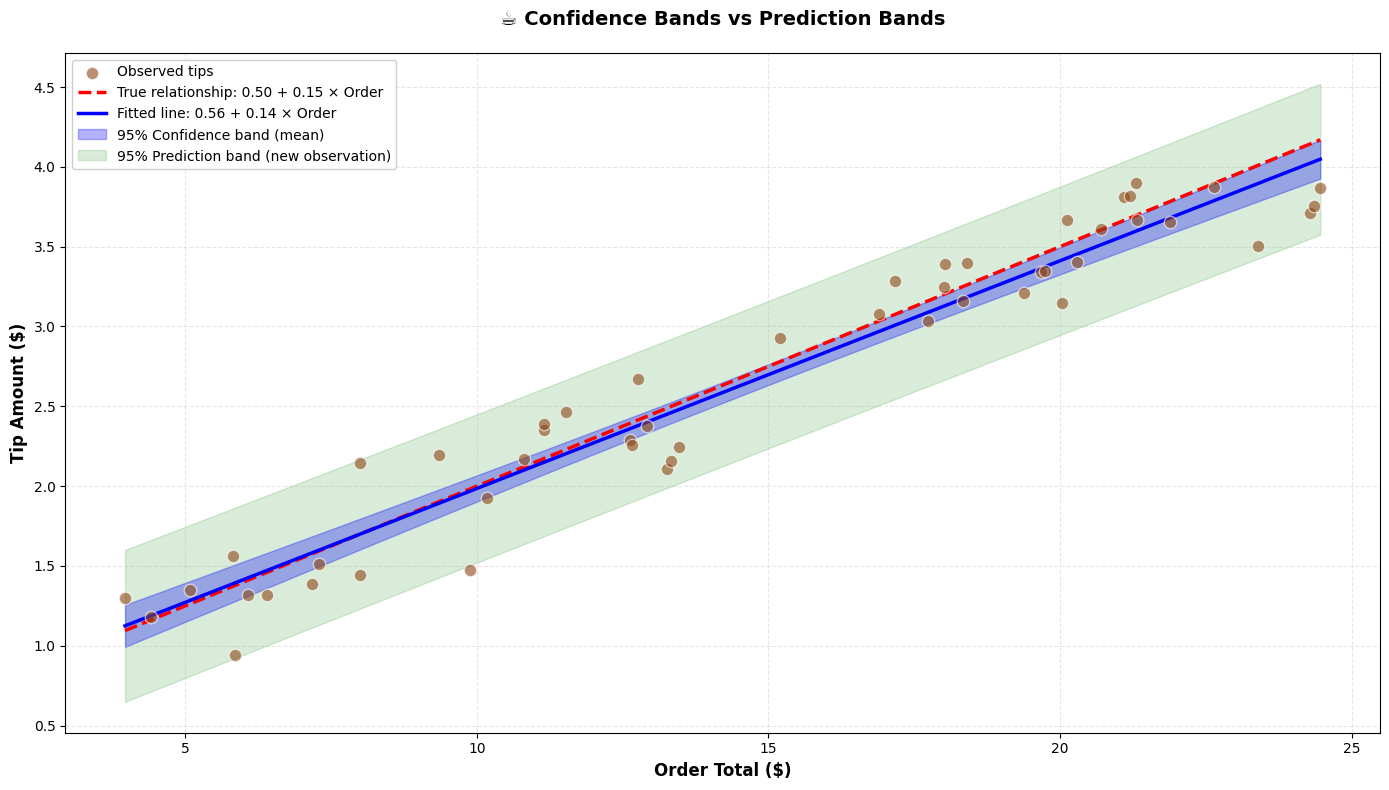

In [4]:
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the observed data
ax.scatter(
    sim.order_totals,
    sim.observed_tips,
    alpha=0.6,
    color="saddlebrown",
    s=80,
    edgecolor="white",
    linewidth=1,
    label="Observed tips",
    zorder=3,
)

# Plot the true relationship
true_tips = sim.true_b1 + sim.true_b2 * order_range
ax.plot(
    order_range,
    true_tips,
    "r--",
    linewidth=2.5,
    label=f"True relationship: {sim.true_b1:.2f} + {sim.true_b2:.2f} × Order",
    zorder=2,
)

# Plot the fitted line
ax.plot(
    order_range,
    y_pred,
    "b-",
    linewidth=2.5,
    label=f"Fitted line: {b_hat[0]:.2f} + {b_hat[1]:.2f} × Order",
    zorder=2,
)

# Plot confidence interval for mean response
ax.fill_between(
    order_range,
    mean_lower,
    mean_upper,
    alpha=0.3,
    color="blue",
    label="95% Confidence band (mean)",
    zorder=1,
)

# Plot prediction interval
ax.fill_between(
    order_range,
    pred_lower,
    pred_upper,
    alpha=0.15,
    color="green",
    label="95% Prediction band (new observation)",
    zorder=0,
)

ax.set_xlabel("Order Total ($)", fontsize=12, fontweight="bold")
ax.set_ylabel("Tip Amount ($)", fontsize=12, fontweight="bold")
ax.set_title(
    "☕ Confidence Bands vs Prediction Bands",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
ax.legend(loc="upper left", fontsize=10, framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()

### Leverage

Hier visualiseren we de _leverage (_hat values_) waardoor we kunnen zien hoe de onzekerheid varieert over de range van _order totals_.

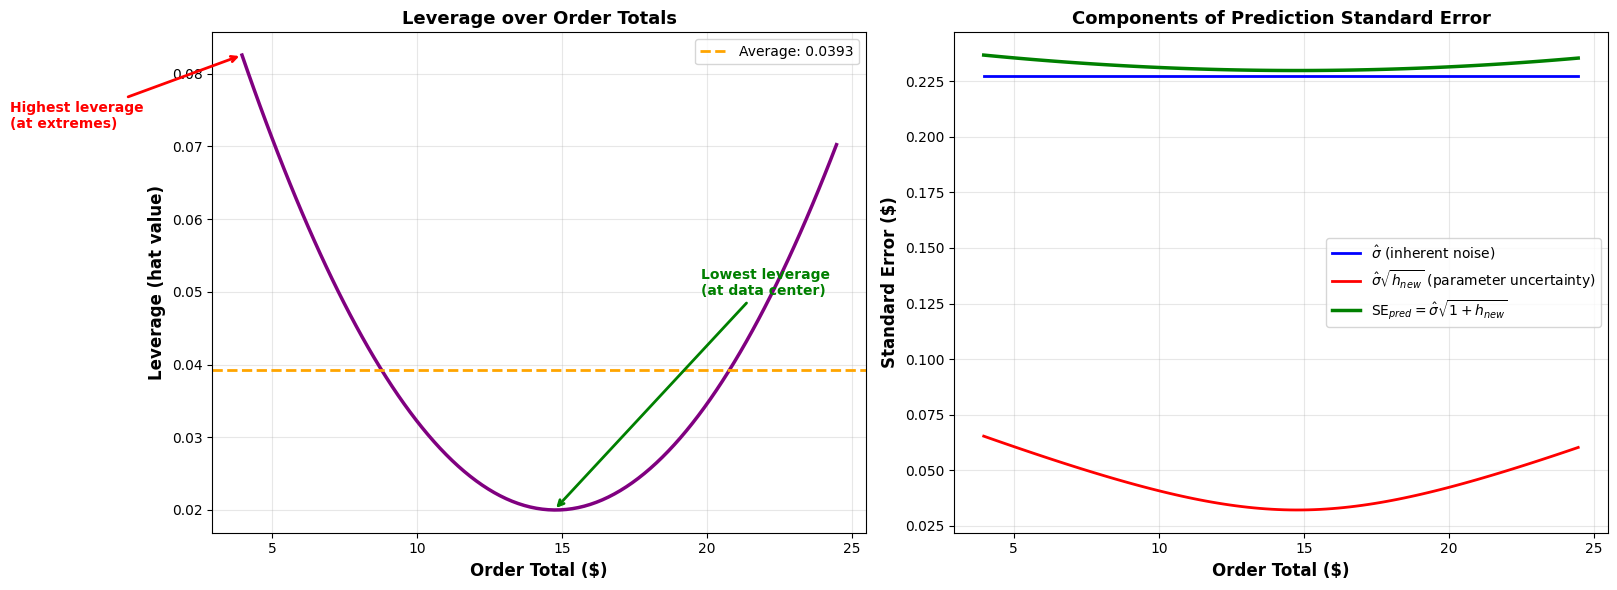

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Leverage values
ax1.plot(order_range, h_new, "purple", linewidth=2.5)
ax1.axhline(
    h_new.mean(),
    color="orange",
    linestyle="--",
    linewidth=2,
    label=f"Average: {h_new.mean():.4f}",
)
ax1.set_xlabel("Order Total ($)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Leverage (hat value)", fontsize=12, fontweight="bold")
ax1.set_title("Leverage over Order Totals", fontsize=13, fontweight="bold")
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add annotations
center_x = sim.order_totals.mean()
min_leverage_idx = np.argmin(np.abs(order_range - center_x))
ax1.annotate(
    "Lowest leverage\n(at data center)",
    xy=(order_range[min_leverage_idx], h_new[min_leverage_idx]),
    xytext=(center_x + 5, h_new.max() * 0.6),
    arrowprops={"arrowstyle": "->", "color": "green", "lw": 2},
    fontsize=10,
    color="green",
    fontweight="bold",
)

max_leverage_idx = np.argmax(h_new)
ax1.annotate(
    "Highest leverage\n(at extremes)",
    xy=(order_range[max_leverage_idx], h_new[max_leverage_idx]),
    xytext=(order_range[max_leverage_idx] - 8, h_new[max_leverage_idx] - 0.01),
    arrowprops={"arrowstyle": "->", "color": "red", "lw": 2},
    fontsize=10,
    color="red",
    fontweight="bold",
)

# Right plot: Components of prediction SE
ax2.plot(
    order_range,
    sigma_hat * np.ones_like(order_range),
    "b-",
    linewidth=2,
    label=r"$\hat{\sigma}$ (inherent noise)",
)
ax2.plot(
    order_range,
    sigma_hat * np.sqrt(h_new),
    "r-",
    linewidth=2,
    label=r"$\hat{\sigma}\sqrt{h_{new}}$ (parameter uncertainty)",
)
ax2.plot(
    order_range,
    se_pred,
    "g-",
    linewidth=2.5,
    label=r"$\text{SE}_{pred} = \hat{\sigma}\sqrt{1 + h_{new}}$",
)
ax2.set_xlabel("Order Total ($)", fontsize=12, fontweight="bold")
ax2.set_ylabel("Standard Error ($)", fontsize=12, fontweight="bold")
ax2.set_title("Components of Prediction Standard Error", fontsize=13, fontweight="bold")
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Likelihood ratio test

Here we test whether the slope parameter $b_1$ contributes significantly to the model by comparing the full model (with intercept and slope) to a reduced model (intercept only).

In [6]:
# Model 1: Full model with intercept and slope
# Already fitted: y = b_0 + b_1 * x
# Compute log-likelihood for full model
log_likelihood_full = -N / 2 * np.log(2 * np.pi * sigma_hat**2) - np.sum(residuals**2) / (
    2 * sigma_hat**2
)

# Model 0: Reduced model (intercept only)
# y = b_0 (mean model)
b0_reduced = np.mean(y)
residuals_reduced = y - b0_reduced
sigma_reduced = np.sqrt(np.sum(residuals_reduced**2) / (N - 1))

# Compute log-likelihood for reduced model
log_likelihood_reduced = -N / 2 * np.log(2 * np.pi * sigma_reduced**2) - np.sum(
    residuals_reduced**2
) / (2 * sigma_reduced**2)

# Likelihood ratio test statistic
Lambda = -2 * (log_likelihood_reduced - log_likelihood_full)

# Degrees of freedom: difference in number of parameters
df = 1  # M_1 - M_0 = 2 - 1

# Critical value from chi-squared distribution (alpha = 0.05)
alpha = 0.05
chi2_critical = stats.chi2.ppf(1 - alpha, df)

# P-value
p_value = 1 - stats.chi2.cdf(Lambda, df)

print(f"Model 0 (reduced): Tip = {b0_reduced:.3f}")
print(f"  Log-likelihood: {log_likelihood_reduced:.3f}")
print(f"  σ: {sigma_reduced:.3f}\n")

print(f"Model 1 (full): Tip = {b_hat[0]:.3f} + {b_hat[1]:.3f} × Order")
print(f"  Log-likelihood: {log_likelihood_full:.3f}")
print(f"  σ: {sigma_hat:.3f}\n")

print(f"Test statistic Λ = {Lambda:.3f}")
print(f"Degrees of freedom: {df}")
print(f"Critical value (χ² at α={alpha}): {chi2_critical:.3f}")
print(f"P-value: {p_value:.6f}\n")

if Lambda > chi2_critical:
    print("✓ CONCLUSION: Reject H₀")
    print(
        f"  The slope parameter contributes significantly to the model ({Lambda:.3f} > {chi2_critical:.3f})"
    )
else:
    print("✗ CONCLUSION: Do not reject H₀")
    print(f"  The slope parameter is not significant ({Lambda:.3f} ≤ {chi2_critical:.3f})")

Model 0 (reduced): Tip = 2.666
  Log-likelihood: -65.672
  σ: 0.909

Model 1 (full): Tip = 0.559 + 0.143 × Order
  Log-likelihood: 4.087
  σ: 0.227

Test statistic Λ = 139.518
Degrees of freedom: 1
Critical value (χ² at α=0.05): 3.841
P-value: 0.000000

✓ CONCLUSION: Reject H₀
  The slope parameter contributes significantly to the model (139.518 > 3.841)
